# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
#Import Modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import os

#Import API Key
from api_keys import api_key

#Define Current Path & Items in Current Working Directory
current_path = os.getcwd()
current_directory = os.listdir()

#Loop Through Items in Current Working Directory
for item in current_directory:
    
    #Find Folder for Global Weather Data
    if item.lower().find('global weather data') >= 0:
        
        #Define Output File Name & Path
        output_file = current_path + '/' + item + '/Global_Weather_Data.csv'
        
    #Find Folder for Output Plots
    elif item.lower().find('images') >= 0:
        
        #Define File Path for Output Plots
        output_plot = current_path + '/' + item + '/'

#Define Range of Latitudes & Longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create Set of Random Latitude & Longitude Combinations
lats = np.random.uniform(low = lat_range[0], high = lat_range[1], size = 1500)
lngs = np.random.uniform(low = long_range[0], high = long_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

#Loop Through Latitude & Longitude Combinations
for lat_lng in lat_lngs:
    
    #Collect Name of Nearest City for Each Latitude & Longitude Combination
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Check if City Name Has Already Been Found
    if city not in cities:
        
        #Append New City Names to Final List of Cities
        cities.append(city)

#Print Length of City Name List
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#Set Open Weather Map API Base URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='

#Define Python Lists for Individual Weather Parameters
city = []
cloud = []
country = []
date = []
humidity = []
latitude = []
longitude = []
temp = []
wind = []

#Set Counter Variable for API Status Messages
count_1 = 1

#Print API Start Status Message
print('Starting Weather Data Collection from API.')
print('----------------------------------')

#Loop Through List of City Names
for name in cities:
    
    #Set Full API URL for Individual City
    full_url = base_url + name + '&APPID=' + api_key + '&units=imperial'
    
    #Collect Individual City Data from API
    raw_data = requests.get(full_url).json()
    
    #Print API Status Message for Individual City
    print('Processing City ' + str(count_1) + ': ' + name.title())
    
    #Set Condition for City Found In API Database
    if raw_data['cod'] == 200:
        
        #Write Individual City Data to Individual Weather Parameter Lists
        city.append(raw_data.get('name'))
        cloud.append(raw_data['clouds']['all'])
        country.append(raw_data['sys']['country'])
        date.append(raw_data['dt'])
        humidity.append(raw_data['main']['humidity'])
        latitude.append(raw_data['coord']['lat'])
        longitude.append(raw_data['coord']['lon'])
        temp.append(raw_data['main']['temp_max'])
        wind.append(raw_data['wind']['speed'])
    else:
        
        #Print API Status Message For Individual City No Found in API Databse
        print(name.title() + ' Not Found! Skipping!')
    
    #Pause Code to Prevent Exceeding API Call Limit
    time.sleep(1.5)
    
    #Increment Counter Variable for API Status Messages
    count_1 = count_1 + 1

#Print API End Status Message
print('----------------------------------')
print('Weather Data Collection Completed')

Starting Weather Data Collection from API.
----------------------------------
Processing City 1: Taolanaro
Taolanaro Not Found! Skipping!
Processing City 2: Bluff
Processing City 3: Yichang
Processing City 4: Airai
Processing City 5: Busselton
Processing City 6: Bengkulu
Bengkulu Not Found! Skipping!
Processing City 7: Rikitea
Processing City 8: Nanortalik
Processing City 9: Norfolk
Processing City 10: Castro
Processing City 11: Hermanus
Processing City 12: Saldanha
Processing City 13: Bredasdorp
Processing City 14: Atuona
Processing City 15: Ushuaia
Processing City 16: Mataura
Processing City 17: Sanica
Processing City 18: Punta Arenas
Processing City 19: Hobart
Processing City 20: Yellowknife
Processing City 21: Provideniya
Processing City 22: Qaanaaq
Processing City 23: Uray
Processing City 24: Chokurdakh
Processing City 25: Cidreira
Processing City 26: Barabai
Processing City 27: Nome
Processing City 28: Roseburg
Processing City 29: Pemberton
Processing City 30: Bubaque
Processing 

Processing City 238: Berlevag
Processing City 239: Gat
Processing City 240: Rio Hondo
Processing City 241: Aporawan
Aporawan Not Found! Skipping!
Processing City 242: Tiksi
Processing City 243: Leningradskiy
Processing City 244: Hunza
Hunza Not Found! Skipping!
Processing City 245: Salalah
Processing City 246: Gimli
Processing City 247: Agucadoura
Processing City 248: Halalo
Halalo Not Found! Skipping!
Processing City 249: Hami
Processing City 250: Labuhan
Processing City 251: Teluk Nibung
Teluk Nibung Not Found! Skipping!
Processing City 252: Garden City
Processing City 253: Wahran
Wahran Not Found! Skipping!
Processing City 254: Hambantota
Processing City 255: Quatre Cocos
Processing City 256: Torbay
Processing City 257: Marzuq
Processing City 258: Suez
Processing City 259: Awassa
Awassa Not Found! Skipping!
Processing City 260: Lompoc
Processing City 261: Souillac
Processing City 262: Victoria
Processing City 263: Manadhoo
Processing City 264: Sangar
Processing City 265: San Quintin

Processing City 485: Sitrah
Processing City 486: Kaitangata
Processing City 487: Heihe
Processing City 488: Mezhdurechensk
Processing City 489: Mayo
Processing City 490: Otukpo
Processing City 491: Abha
Processing City 492: Manga
Processing City 493: Little Current
Processing City 494: Shawinigan
Processing City 495: Zyryanka
Processing City 496: Robertsport
Processing City 497: Reforma
Processing City 498: Matamoros
Processing City 499: Semporna
Processing City 500: Mitsamiouli
Processing City 501: Sistranda
Processing City 502: Tiznit
Processing City 503: Carutapera
Processing City 504: Sinnamary
Processing City 505: Silvan
Processing City 506: Kurchum
Processing City 507: One Hundred Mile House
One Hundred Mile House Not Found! Skipping!
Processing City 508: Louisbourg
Louisbourg Not Found! Skipping!
Processing City 509: Biltine
Processing City 510: Bolungarvik
Bolungarvik Not Found! Skipping!
Processing City 511: Uchaly
Processing City 512: Chapais
Processing City 513: Ossora
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
#Create Data Frame of Combined City Weather
city_data = pd.DataFrame({'City': city, 'Cloudiness (%)': cloud, 'Country': country, 'Date': date, 'Humidity (%)': humidity,
                          'Latitude': latitude, 'Longitude': longitude, 'Max Temp (F)': temp, 'Wind Speed (mph)': wind})

#Display Combined City Weather Data Frame
city_data

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,Bluff,24,AU,1571349873,82,-23.58,149.07,71.57,1.99
1,Yichang,0,CN,1571349874,94,30.77,111.32,47.38,3.22
2,Airai,5,TL,1571349876,71,-8.93,125.41,69.07,3.89
3,Busselton,0,AU,1571349878,71,-33.64,115.35,44.01,17.67
4,Rikitea,17,PF,1571349881,80,-23.12,-134.97,71.91,9.15
5,Nanortalik,100,GL,1571349883,77,60.14,-45.24,39.03,2.71
6,Norfolk,1,US,1571349884,38,36.85,-76.29,63.00,8.05
7,Castro,90,CL,1571349886,87,-42.48,-73.76,51.80,3.36
8,Hermanus,0,ZA,1571349888,91,-34.42,19.24,63.00,13.73
9,Saldanha,96,PT,1571349889,93,41.42,-6.55,58.32,2.71


In [31]:
#Export Combined City Weather Data Frame to CSV File
city_data.to_csv(output_file, index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

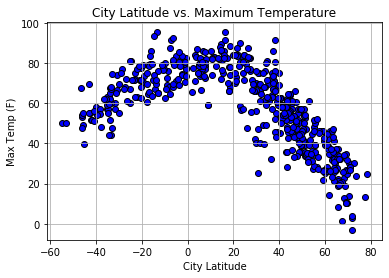

In [32]:
#Plot Latitude Data Versus Maximum Temperature Data
F1, AX1 = plt.subplots()
AX1.scatter(city_data['Latitude'], city_data['Max Temp (F)'], facecolor = 'blue', edgecolor = 'black')
AX1.grid()
AX1.set_title('City Latitude vs. Maximum Temperature')
AX1.set_xlabel('City Latitude')
AX1.set_ylabel('Max Temp (F)')
plt.savefig(output_plot + 'City_Latitude_vs_Maximum_Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

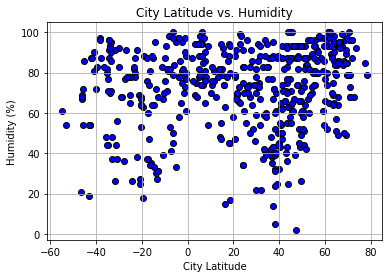

In [33]:
#Plot Latitude Data Versus Humidity Data
F2, AX2 = plt.subplots()
AX2.scatter(city_data['Latitude'], city_data['Humidity (%)'], facecolor = 'blue', edgecolor = 'black')
AX2.grid()
AX2.set_title('City Latitude vs. Humidity')
AX2.set_xlabel('City Latitude')
AX2.set_ylabel('Humidity (%)')
plt.savefig(output_plot + 'City_Latitude_vs_Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

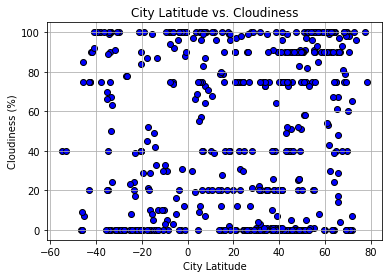

In [34]:
#Plot Latitude Data Versus Cloudiness Data
F3, AX3 = plt.subplots()
AX3.scatter(city_data['Latitude'], city_data['Cloudiness (%)'], facecolor = 'blue', edgecolor = 'black')
AX3.grid()
AX3.set_title('City Latitude vs. Cloudiness')
AX3.set_xlabel('City Latitude')
AX3.set_ylabel('Cloudiness (%)')
plt.savefig(output_plot + 'City_Latitude_vs_Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

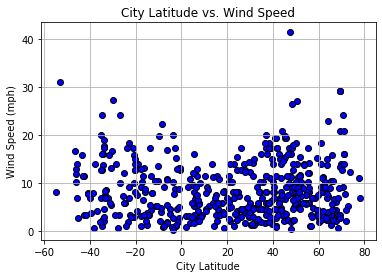

In [35]:
#Plot Latitude Data Versus Wind Speed Data
F4, AX4 = plt.subplots()
AX4.scatter(city_data['Latitude'], city_data['Wind Speed (mph)'], facecolor = 'blue', edgecolor = 'black')
AX4.grid()
AX4.set_title('City Latitude vs. Wind Speed')
AX4.set_xlabel('City Latitude')
AX4.set_ylabel('Wind Speed (mph)')
plt.savefig(output_plot + 'City_Latitude_vs_Wind_Speed.png')
plt.show()